In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
titanic_data = pd.read_csv(r'C:\Users\USER\Desktop\Uni lvl 100\AI DataSet\titanic(1)\train.csv')

In [134]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


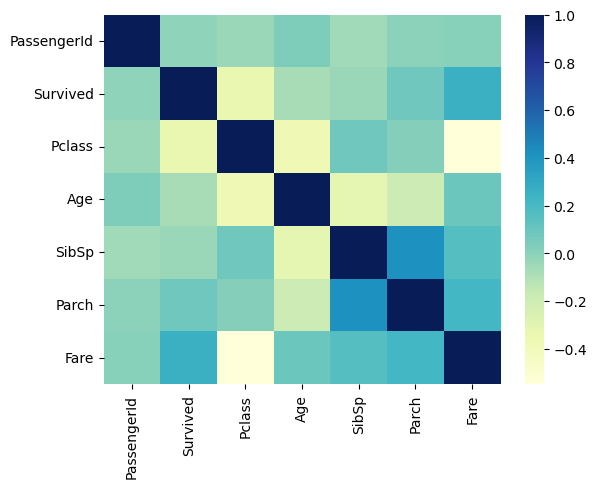

In [135]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation matrix
numeric_cols = titanic_data.select_dtypes(include=['float64', 'int64']).columns

# Create the heatmap
sns.heatmap(titanic_data[numeric_cols].corr(), cmap="YlGnBu")

# Show the plot
plt.show()


#sns.heatmap(titanic_data.corr(), cmap = "YlGnBu")
#plt.show()

In [136]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize the split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_indices, test_indices in split.split(titanic_data, titanic_data[['Survived', 'Pclass', 'Sex']]):
    C = titanic_data.loc[train_indices]
    Strat_test_set = titanic_data.loc[test_indices]

# Now, Strat_train_test and Strat_test_indices contain the stratified training and testing sets.


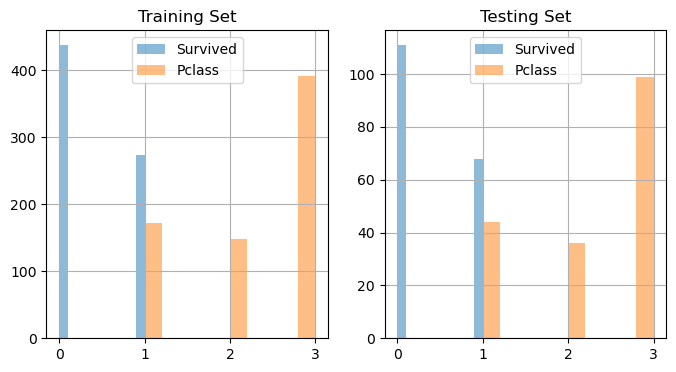

In [137]:
'''plt.subplot(1,2,1)
Strat_train_set['Survived'].hist()
Strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
Strat_test_set['Survived'].hist()
Strat_test_set['Pclass'].hist()

plt.show()'''


plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
Strat_train_set['Survived'].hist(alpha=0.5, label='Survived')
Strat_train_set['Pclass'].hist(alpha=0.5, label='Pclass')
plt.legend()
plt.title('Training Set')

plt.subplot(1, 2, 2)
Strat_test_set['Survived'].hist(alpha=0.5, label='Survived')
Strat_test_set['Pclass'].hist(alpha=0.5, label='Pclass')
plt.legend()
plt.title('Testing Set')

# Show the plots
plt.show()


In [138]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y =None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy = "mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [194]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y =None):
        return self
        
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C","S","Q", "N"]

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X       

In [196]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    
    def fit(self, X, y =None):
        return self

    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin","Sex", "N"], axis = 1, errors = "ignore")
    

In [198]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                    ("featureencoder", FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

In [200]:
Strat_train_set = pipeline.fit_transform(Strat_train_set)

In [204]:
Strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 867 to 802
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [208]:
from sklearn.preprocessing import StandardScaler
X = Strat_train_set.drop(['Survived'], axis = 1)
y = Strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [210]:
X_data

array([[ 1.6422641 , -1.56828591,  0.09549538, ...,  0.61197825,
        -0.73561236,  0.73561236],
       [ 0.67661178, -0.37019624, -0.29160547, ...,  0.61197825,
        -0.73561236,  0.73561236],
       [-1.53893728,  0.82789342, -1.7625887 , ...,  0.61197825,
        -0.73561236,  0.73561236],
       ...,
       [-1.52336225, -1.56828591,  2.72778116, ..., -1.63404501,
        -0.73561236,  0.73561236],
       [ 0.61431163,  0.82789342,  1.10195759, ...,  0.61197825,
        -0.73561236,  0.73561236],
       [ 1.38916974, -1.56828591, -1.45290802, ...,  0.61197825,
        -0.73561236,  0.73561236]])

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    { "n_estimators": [10, 100, 200, 500 ,1000],"max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv =3, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500, 1000]}],
             return_train_score=True, scoring='accuracy')

In [229]:
final_clf = grid_search.best_estimator_

In [231]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=200)

In [237]:
Strat_test_set = pipeline.fit_transform(Strat_test_set)

In [245]:
X = Strat_train_set.drop(['Survived'], axis = 1)
y = Strat_train_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X)
y_data_test = y.to_numpy()

In [247]:
final_clf.score(X_data_test, y_data_test)

0.9508426966292135

In [249]:
final_data = pipeline.fit_transform(titanic_data)

In [253]:
X_final = final_data.drop(['Survived'], axis = 1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_test = y.to_numpy()

In [255]:
prod_clf = RandomForestClassifier()

param_grid = [
    { "n_estimators": [10, 100, 200, 500],"max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv =3, scoring = "accuracy", return_train_score = True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [257]:
prod_final_clf = grid_search.best_estimator_

In [259]:
prod_final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3)

In [267]:
titanic_test_data = pd.read_csv(r'C:\Users\USER\Desktop\Uni lvl 100\AI DataSet\titanic(1)\test.csv')

In [271]:
#titanic_test_data

In [273]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [277]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [285]:
'''X_final_test = final_data
X_final_test = X_final_test.fillna(method = "ffill")'''
X_final_test = final_test_data
X_final_test = X_final_test.ffill()  # Forward fill
# or
# X_final_test = X_final_test.bfill()  # Backward fill


scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [287]:
predictions = prod_final_clf.predict(X_data_final_test)

In [289]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [309]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv(r'C:\Users\USER\Desktop\Uni lvl 100\AI DataSet\titanic(1)\predictions.csv', index=False)

In [311]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [313]:
#print(titanic_test_data.columns)